In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Tentukan folder dataset
dataset_folder = "dataset/dataset CIC-IDS- 2017"

# 2. Ambil semua file CSV di folder
csv_files = [os.path.join(dataset_folder, file) for file in os.listdir(dataset_folder) if file.endswith(".csv")]

# 3. Gabungkan semua CSV jadi satu dataset
df_list = []
for file in csv_files:
    print(f"Loading {file} ...")
    df = pd.read_csv(file, sep=None, engine='python') 
    # print(f"Columns in {file}:", df.columns)  # low_memory=False untuk mencegah warning
    df_list.append(df)



df = pd.concat(df_list, ignore_index=True)
print(f"Total data setelah digabung: {df.shape}")


# 4. Hapus kolom yang tidak relevan (jika ada)
columns_to_drop = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# 5. Encoding fitur kategorikal (jika ada)
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.lower()  # Convert to lowercase for consistency

categorical_columns = ['Protocol', 'Flow Flags']
for col in categorical_columns:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])

if 'label' not in df.columns:
    raise KeyError("The column 'Label' was not found in the dataset. Check column names:", df.columns)


# 6. Encoding label (BENIGN = 0, serangan lain = 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# 7. Pisahkan fitur (X) dan label (y)
X = df.drop(columns=["label"])
y = df["label"]

# Check for NaN, inf, or large values
print("Checking for NaN values:", X.isna().sum().sum())
print("Checking for infinite values:", np.isinf(X).sum().sum())
print("Max value in dataset:", X.max().max())

# Replace inf and NaN with 0
# Ensure all values are finite
print("Replacing Inf and NaN values...")
X = X.replace([np.inf, -np.inf], np.nan)  # Convert inf to NaN
X = X.fillna(X.median())  # Fill NaN with median values instead of 0
print("Inf and NaN values replaced.")

print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split done.")

print("Scaling data...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data scaling done.")

print("Training model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training completed.")


# 11. Evaluasi model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Loading dataset/dataset CIC-IDS- 2017/Wednesday-workingHours.pcap_ISCX.csv ...
Loading dataset/dataset CIC-IDS- 2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv ...
Loading dataset/dataset CIC-IDS- 2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv ...
Loading dataset/dataset CIC-IDS- 2017/Monday-WorkingHours.pcap_ISCX.csv ...
Loading dataset/dataset CIC-IDS- 2017/Friday-WorkingHours-Morning.pcap_ISCX.csv ...
Loading dataset/dataset CIC-IDS- 2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv ...
Loading dataset/dataset CIC-IDS- 2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv ...
Loading dataset/dataset CIC-IDS- 2017/Tuesday-WorkingHours.pcap_ISCX.csv ...
Total data setelah digabung: (2830743, 79)
Checking for NaN values: 1358
Checking for infinite values: 4376
Max value in dataset: inf
Replacing Inf and NaN values...
Inf and NaN values replaced.
Splitting data...
Data split done.
Scaling data...
Data scaling done.
Training model...
Model training c

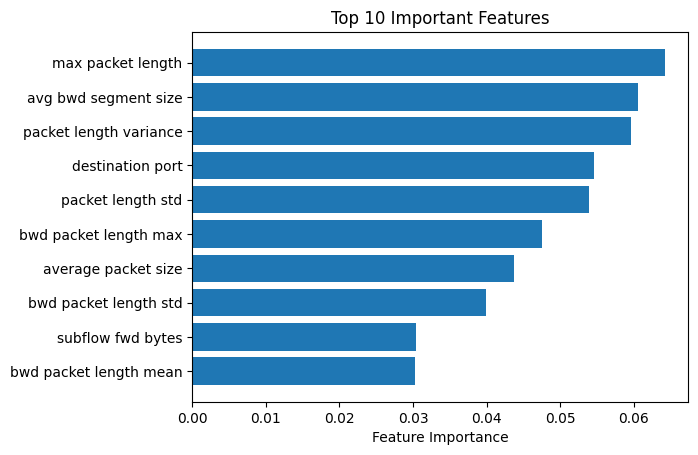

In [2]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X.columns

sorted_idx = np.argsort(feature_importances)[-10:]  # Top 10 features
plt.barh([feature_names[i] for i in sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.show()

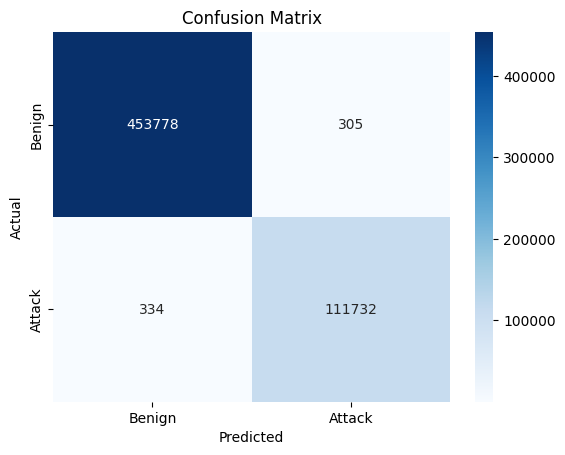

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model training completed.")

# Evaluasi
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Logistic Regression model...
Model training completed.
Accuracy: 0.9430538603795114
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    454083
           1       0.86      0.85      0.86    112066

    accuracy                           0.94    566149
   macro avg       0.91      0.91      0.91    566149
weighted avg       0.94      0.94      0.94    566149



In [7]:
from sklearn.ensemble import GradientBoostingClassifier

print("Training Gradient Boosting model...")
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("Model training completed.")

# Evaluasi
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Gradient Boosting model...
Model training completed.
Accuracy: 0.9965291822470763
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454083
           1       0.99      0.99      0.99    112066

    accuracy                           1.00    566149
   macro avg       0.99      0.99      0.99    566149
weighted avg       1.00      1.00      1.00    566149



In [9]:
from xgboost import XGBClassifier

print("Training XGBoost model...")
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist')
model.fit(X_train, y_train)
print("Model training completed.")

# Evaluasi
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training XGBoost model...


/home/paul/.local/share/virtualenvs/NeuroSys-AI-hMYEmNG9/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/paul/.local/share/virtualenvs/NeuroSys-AI-hMYEmNG9/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training completed.


/home/paul/.local/share/virtualenvs/NeuroSys-AI-hMYEmNG9/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/paul/.local/share/virtualenvs/NeuroSys-AI-hMYEmNG9/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:56] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9992440152680655
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454083
           1       1.00      1.00      1.00    112066

    accuracy                           1.00    566149
   macro avg       1.00      1.00      1.00    566149
weighted avg       1.00      1.00      1.00    566149



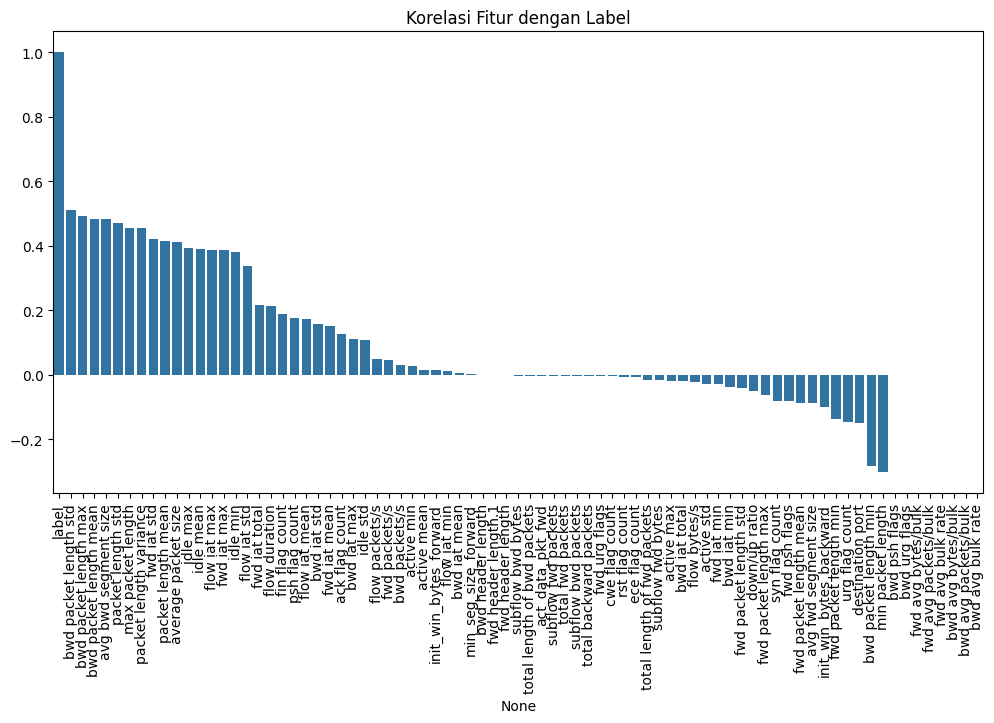

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi dengan label
correlation = df.corr()["label"].sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title("Korelasi Fitur dengan Label")
plt.show()

In [11]:
correlation = df.corr()["label"].sort_values(ascending=False)
print(correlation.head(10))  # Lihat 10 fitur paling berkorelasi

label                     1.000000
bwd packet length std     0.510216
bwd packet length max     0.492007
bwd packet length mean    0.484189
avg bwd segment size      0.484189
packet length std         0.470252
max packet length         0.454054
packet length variance    0.453847
fwd iat std               0.422755
packet length mean        0.414059
Name: label, dtype: float64


In [15]:
print(type(X_train))  # Harusnya <class 'pandas.DataFrame'>

<class 'numpy.ndarray'>


In [16]:
feature_names = df.drop(columns=['label']).columns  # Simpan daftar fitur

In [17]:
X_train = pd.DataFrame(X_train, columns=feature_names)

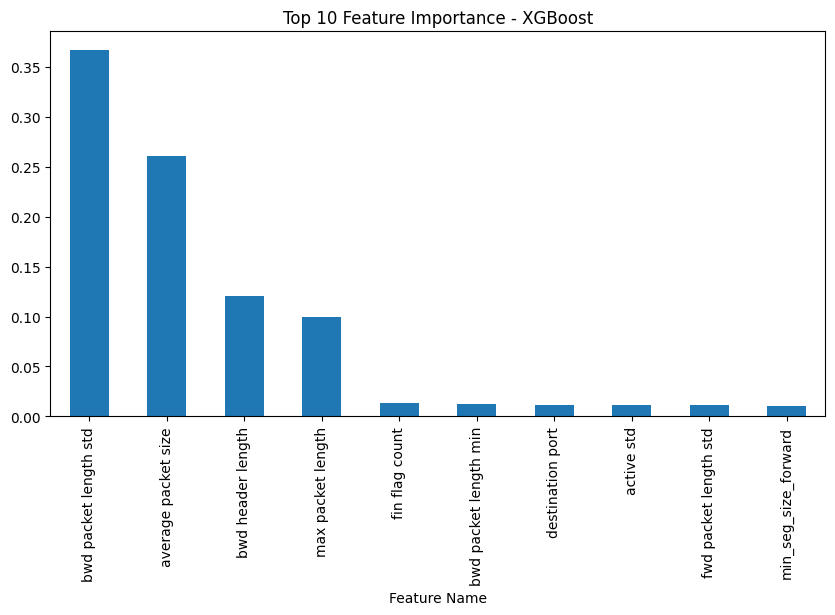

In [18]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# Pastikan X_train masih dalam bentuk DataFrame
xgb_model = xgb.XGBClassifier(eval_metric='logloss', tree_method='hist', device='cuda')
xgb_model.fit(X_train, y_train)

# Ambil feature importance
feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot hasilnya
plt.figure(figsize=(10, 5))
feature_importance[:10].plot(kind='bar')
plt.title("Top 10 Feature Importance - XGBoost")
plt.xlabel("Feature Name")
plt.show()

In [21]:
import pandas as pd

# Konversi kembali ke DataFrame (asumsikan X_train berasal dari DataFrame awal `df`)
X_train_df = pd.DataFrame(X_train, columns=df.drop(columns=["label"]).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(columns=["label"]).columns)

# Hapus fitur "bwd packet length std"
X_train_new = X_train_df.drop(columns=["bwd packet length std"])
X_test_new = X_test_df.drop(columns=["bwd packet length std"])

xgb_model.fit(X_train_new, y_train)
y_pred = xgb_model.predict(X_test_new)

print("Accuracy setelah menghapus bwd packet length std:", accuracy_score(y_test, y_pred))

Accuracy setelah menghapus bwd packet length std: 0.9992687437406054


SyntaxError: invalid syntax (728349862.py, line 1)